In [126]:
#### Analysis rsp alcohol competition
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from statsmodels.formula.api import ols
import scikit_posthocs as sp

In [106]:
os.getcwd()

'C:\\Users\\David\\Documents\\GitHub\\Retreat_2019\\R_S_P\\results'

### Load the files into one DataFrame

In [107]:
#root_save = os.getcwd() + '\\results\\' 
#os.chdir(root_save)
os.listdir()

frames = []
for idx, file in enumerate(os.listdir()):
    df_s = pd.read_excel(file)
    df_s['rounds'] = idx
    frames.append(df_s)

df = pd.concat(frames, ignore_index=True)
df


,player1,player2,resp1,resp2,result,winner_round,b_p1,b_p2,repetition,p1_randomness,p2_randomness,rounds
0,david,genis,r,r,draw,draw,7,10,2,137.801,103.796,0
1,david,genis,r,s,david,draw,7,10,2,137.801,103.796,0
2,david,genis,r,p,genis,draw,7,10,2,137.801,103.796,0
3,david,genis,r,p,genis,draw,7,10,2,137.801,103.796,0
4,david,genis,r,s,david,draw,7,10,2,137.801,103.796,0
5,david,genis,r,r,draw,draw,7,10,2,137.801,103.796,0
6,david,genis,r,s,david,draw,7,10,2,137.801,103.796,0
7,david,genis,r,r,draw,draw,7,10,2,137.801,103.796,0
8,david,genis,p,s,genis,draw,7,10,2,137.801,103.796,0
9,david,genis,r,r,draw,draw,7,10,2,137.801,103.796,0


### Correlation beer consumption and randomness ?

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


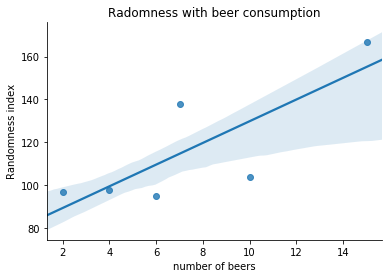

                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     6.793
Date:                Mon, 14 Jan 2019   Prob (F-statistic):             0.0596
Time:                        17:36:45   Log-Likelihood:                -25.316
No. Observations:                   6   AIC:                             54.63
Df Residuals:                       4   BIC:                             54.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.1241     16.463      4.806      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [108]:
beer_n = []
r_value=[]
winner=[]

for r in df['rounds'].unique():
    r_value.append(df.loc[df['rounds']==r, 'p1_randomness'].iloc[0])
    r_value.append(df.loc[df['rounds']==r, 'p2_randomness'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    beer_n.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  
   

    
df_b_r = pd.DataFrame({'beer': beer_n, 'rand': r_value})
sns.regplot(df_b_r['beer'], df_b_r['rand'], ci=68, fit_reg=True)
plt.title('Radomness with beer consumption')
plt.xlabel('number of beers')
plt.ylabel('Randomness index')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#ols
mod = ols('rand ~ beer', data=df_b_r).fit()
print(mod.summary())

In [113]:
#df_b_r

,beer,rand
0,7,137.801
1,10,103.796
2,2,96.525
3,15,166.989
4,4,97.710
5,6,94.938


## Is beeing random a good strategy to win?

In [118]:
v1 = df.loc[df['rounds']==r, 'p2_randomness'].iloc[0]
v2 = df.loc[df['rounds']==r, 'p1_randomness'].iloc[0]

np.mean([v1, v2])
#print(v1, v2)

96.324

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


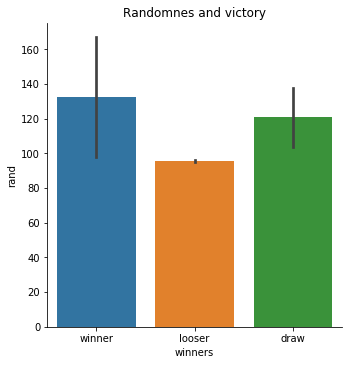

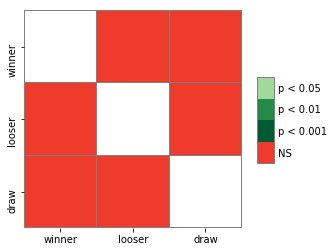

          winner    looser      draw
winner -1.000000  0.551079  0.900000
looser  0.551079 -1.000000  0.728233
draw    0.900000  0.728233 -1.000000


In [131]:
### I create a draw mean value by combing bothe the random value and beer consumption of the participants

w_r_value=[]
l_r_value=[]
d_r_value=[]

w_b=[]
l_b=[]
d_b=[]


for r in df['rounds'].unique():
    win = df.loc[df['rounds']==r, 'winner_round'].iloc[0]
    if win == df.loc[df['rounds']==r, 'player1'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'p1_randomness'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'p2_randomness'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])  
    elif win == df.loc[df['rounds']==r, 'player2'].iloc[0]:
        w_r_value.append(df.loc[df['rounds']==r, 'p2_randomness'].iloc[0])
        l_r_value.append(df.loc[df['rounds']==r, 'p1_randomness'].iloc[0])
        w_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0])
        l_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0])
    else: ## draw
        d_r_value.append(df.loc[df['rounds']==r, 'p2_randomness'].iloc[0] ) 
        d_r_value.append( df.loc[df['rounds']==r, 'p1_randomness'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p2'].iloc[0] )
        d_b.append(df.loc[df['rounds']==r, 'b_p1'].iloc[0] )

        

### Dataframe for each    
df_win = pd.DataFrame({'beer': w_b, 'rand': w_r_value})
df_win['winners'] = 'winner'
df_l = pd.DataFrame({'beer': l_b, 'rand': l_r_value})
df_l['winners'] = 'looser'
df_d = pd.DataFrame({'beer': d_b, 'rand': d_r_value})
df_d['winners'] = 'draw'
#concatenate them
df_w_l=pd.concat([df_win, df_l, df_d], ignore_index=True)

#Difference in mean randomness?
sns.factorplot(x='winners', y='rand', data=df_w_l, kind='bar')
plt.title('Randomnes and victory')
plt.show()

#mod = ols('rand ~ winners', data=df_w_l).fit()
#print(mod.summary())

pc = sp.posthoc_tukey(df_w_l, val_col='rand', group_col='winners') 
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
print(pc)


In [123]:
df_w_l

,beer,rand,winners
0,15,166.989,winner
1,4,97.710,winner
2,2,96.525,looser
3,6,94.938,looser
4,10,103.796,draw
5,7,137.801,draw


In [132]:

## Dimple regression model where we try to explain randomness as a function of beer consumption and as a winning strategy
mod = ols('rand ~ beer * C(winners)', data=df_w_l).fit()
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                   rand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 14 Jan 2019   Prob (F-statistic):                nan
Time:                        17:50:15   Log-Likelihood:                 169.22
No. Observations:                   6   AIC:                            -326.4
Df Residuals:                       0   BIC:                            -327.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalar